If there were a way to calculate a "running median" you could save space by only having one image loaded at a time. Unfortunately, there’s no way to do an exact running median, but there are ways to do it approximately.

The binapprox algorithm does just this. The idea behind it is to find the median from the data's histogram. 

Example:

In [9]:
import random
my_list = []
for _ in range(30):
    my_list.append(random.randint(7, 16))
len(my_list)

30

In [8]:
my_list2 = [random.randint(7, 16) for _ in range(30)]
len(my_list2)

30

(array([5., 0., 1., 4., 1., 5., 7., 4., 2., 1.]),
 array([ 7. ,  7.9,  8.8,  9.7, 10.6, 11.5, 12.4, 13.3, 14.2, 15.1, 16. ]),
 <BarContainer object of 10 artists>)

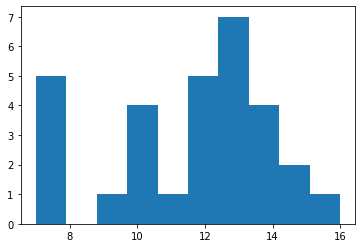

In [15]:
import matplotlib.pyplot as plt
plt.hist(my_list2)

In [16]:
import numpy as np

def median_bins(values, B):
    mean = np.mean(values)
    std = np.std(values)
    
  # Initialise bins
    left_bin = 0
    bins = np.zeros(B)
    bin_width = 2*std/B
    
  # Bin values
    for value in values:
        if value < mean - std:
            left_bin += 1
        elif value < mean + std:
            bin = int((value - (mean - std))/bin_width)
            bins[bin] += 1
    # Ignore values above mean + std

    return mean, std, left_bin, bins


def median_approx(values, B):
  # Call median_bins to calculate the mean, std,
  # and bins for the input values
    mean, std, left_bin, bins = median_bins(values, B)
    	
  # Position of the middle element
    N = len(values)
    mid = (N + 1)/2

    count = left_bin
    for b, bincount in enumerate(bins):
        count += bincount
        if count >= mid:
      # Stop when the cumulative count exceeds the midpoint
            break

    width = 2*std/B
    median = mean - std + width*(b + 0.5)
    return median

In [17]:
median1 = median_approx(my_list2, 10)
median1

11.860256283945908

In [18]:
median2 = np.median(my_list2)
median2

12.0